# SUPERVISED ML CLASSIFICATION PROBLEM ON LOAN DEFAULT PREDICTION 

Identifying loan defaulters is a critical business problem for any lender because it can help reduce the financial risk associated with lending. Loan defaulters can have a significant impact on a lender's profitability, as they can lead to losses in the form of unpaid principal, interest, and other associated costs.
By identifying loan defaulters using machine learning techniques, lenders can take proactive steps to mitigate the risk of default and reduce the impact on their bottom line. Here are some ways in which identifying loan defaulters can help solve the business problem:
Improved decision-making: Identifying loan defaulters can help lenders make informed decisions about whether to approve or reject loan applications. By using machine learning models to predict the likelihood of default, lenders can avoid approving risky loans and reduce their exposure to default risk.
Early intervention: Early identification of loan defaulters can help lenders take proactive steps to prevent defaults. For example, lenders can contact borrowers who are at risk of default and offer them alternative repayment plans or other forms of assistance to help them avoid default.
Reduced losses: By identifying loan defaulters early, lenders can take steps to minimize their losses. This can include repossessing collateral, pursuing legal action, or selling off the debt to a debt collection agency.
Improved customer satisfaction: By taking proactive steps to help borrowers avoid default, lenders can improve customer satisfaction and loyalty. This can help lenders build long-term relationships with their customers and improve their reputation in the market.
In summary, identifying loan defaulters using machine learning techniques can help lenders make informed decisions, reduce losses, and improve customer satisfaction. It is a critical business problem that can have a significant impact on a lender's profitability and success in the market.




In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('max_colwidth', 10000)
pd.options.display.width = 100

# LOAD TRAIN DATASET

In [3]:
#load data
trainn = pd.read_csv('/Users/barnalikkapradhan/Downloads/train.csv') 
trainn = trainn.drop(trainn.columns[0], axis = 1)
trainn

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,33018.0,11760,8911.377904,59.0,BAT1586599,16.200249,B,G1,MORTGAGE,67374.95410,Source Verified,n,Credit card refinancing,25.780390,0,0,36,0,1670,56.114276,33,f,1719.768936,0.002127,0.040202,1.005686,0,INDIVIDUAL,2,0,50,48379,4599,0
1,NaN,25543,34092.731820,59.0,BAT1766061,11.592735,B,A4,RENT,25818.51668,Source Verified,n,Debt consolidation,24.154811,0,0,12,0,2659,53.242844,23,f,1367.617281,0.021474,5.249225,1.134362,0,INDIVIDUAL,24,0,582,211574,20791,0
2,16774.0,9717,7949.140886,58.0,BAT2803411,10.963143,B,B4,MORTGAGE,126202.81660,Source Verified,n,Credit card refinancing,23.457116,0,0,15,0,10290,67.009689,39,w,2635.095489,0.052362,2.846310,1.554686,0,INDIVIDUAL,82,0,14,313080,25499,0
3,12977.0,32262,10217.109450,59.0,BAT2575549,11.372651,A,D4,RENT,47273.49080,Source Verified,n,Credit card refinancing,13.156569,0,0,12,0,1364,37.743072,6,f,1100.507907,0.049318,5.314602,1.047915,0,INDIVIDUAL,129,0,42,98679,15270,0
4,5937.0,22241,13121.033610,59.0,BAT2803411,8.885435,D,A3,RENT,35144.68346,Verified,n,Credit card refinancing,19.846101,7,0,15,0,8739,45.797298,9,w,453.533367,0.000266,4.131232,0.972319,0,INDIVIDUAL,122,0,2036,501316,22000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67558,19034.0,7800,9207.727021,59.0,BAT2078974,11.167840,C,B4,RENT,51005.37247,Not Verified,n,Debt Consolidation,26.713031,0,0,11,0,2184,68.182400,19,w,247.769751,0.030025,5.023079,1.084516,0,INDIVIDUAL,85,0,40,13265,24302,1
67559,11910.0,21983,10648.403410,58.0,BAT4136152,9.113640,B,A1,RENT,64894.40877,Source Verified,n,Debt consolidation,20.431618,0,0,11,0,2539,52.038212,19,w,316.340399,24.842045,4.562045,0.538600,0,INDIVIDUAL,57,0,53,65532,24945,1
67560,21914.0,15981,23044.056430,59.0,BAT2558388,12.296416,A,A2,MORTGAGE,45291.29769,Source Verified,n,Debt consolidation,19.794152,0,0,12,0,234,73.372217,4,f,1640.678423,0.036568,1.343841,1.225884,0,INDIVIDUAL,82,0,17,30131,6149,0
67561,2962.0,23476,15955.635420,59.0,BAT5547201,12.970257,E,B3,RENT,82517.67835,Not Verified,n,Credit card refinancing,15.222310,1,0,12,0,7135,74.277868,20,w,1928.682567,0.053831,4.027871,37.037358,0,INDIVIDUAL,45,0,31,306139,7609,0


In [4]:
# Thier is total of 67,563 number of data with 34 different varibales at large.
trainn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67563 entries, 0 to 67562
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   66443 non-null  float64
 1   Funded Amount                 67563 non-null  int64  
 2   Funded Amount Investor        67563 non-null  float64
 3   Term                          66683 non-null  float64
 4   Batch Enrolled                67563 non-null  object 
 5   Interest Rate                 67563 non-null  float64
 6   Grade                         67563 non-null  object 
 7   Sub Grade                     67563 non-null  object 
 8   Home Ownership                67563 non-null  object 
 9   Employment Duration           67563 non-null  float64
 10  Verification Status           67563 non-null  object 
 11  Payment Plan                  67563 non-null  object 
 12  Loan Title                    67563 non-null  object 
 13  D

In [5]:
# Variables like Loan amount applied for and Term period of the loan have null values
trainn.isnull().sum()

Loan Amount                     1120
Funded Amount                      0
Funded Amount Investor             0
Term                             880
Batch Enrolled                     0
Interest Rate                      0
Grade                              0
Sub Grade                          0
Home Ownership                     0
Employment Duration                0
Verification Status                0
Payment Plan                       0
Loan Title                         0
Debit to Income                    0
Delinquency - two years            0
Inquires - six months              0
Open Account                       0
Public Record                      0
Revolving Balance                  0
Revolving Utilities                0
Total Accounts                     0
Initial List Status                0
Total Received Interest            0
Total Received Late Fee            0
Recoveries                         0
Collection Recovery Fee            0
Collection 12 months Medical       0
A

Below taking a new Variable TRAIN where we removed some unnecessary columns from our training dataset.

The columns that have been taken into consideration are:


1) It was a better idea to take Funded Amount referring to the total amount of money that has been prvided through funding,rather then taking Funded amount investor which only gave insight into particular amounts invested or the Loan amount which had been applied for. 

2) Term gives us an idea about the time period of the loan, whether it is a short, medium or long term loan and is a strong variable when combined with other independent variables one of them being deliquency- two years when the payer hasn't made a payment for 2 years or so there is a high possibility that person might turn out to be a a loan defaulter. Since deliquency-2 years has already been taken as a variable i choose to drop Accounts Delinquent.

3) Debit to income ratio is an important variable which evaluate a borrower's creditworthiness and ability to repay a loan, by making monthly payments on time through their own personal income.

4) Revolving balance another which is the is the amount of debt that a borrower has on a revolving credit account, and it can change from month to month based on the borrower's usage and payments & Debit to income ratio which is an important variable to evaluate a borrower's creditworthiness and ability to repay a loan, by making monthly payments on time through their own personal income are strong predictor variables to predict the loan status. 

5)Initial List Status refers to the status of a borrower's account when it is first listed as being in default by a lender. This status could indicate the severity of the default and the stage of the collection process that the account is in which can further affect their credit score, their ability to obtain credit in the future.

6) Recoveries" in finance typically refers to the amount of money that a lender or investor is able to recover from a defaulted loan or investment that has been chosen to predict the loan status while dropping variables like collection recovering fee & Collection 12 months Medical. 

7) Total Collection Amount" refers to the total amount of money that an agency is attempting to collect from a borrower who has defaulted on a loan,

Total Current Balance" typically refers to the total amount of money owed on a loan or credit account as of the current date.

9) Total Revolving Credit Limit is an important metric as if a borrower is relying heavily on credit, the person maybe at a risk of defaulting.

10) Employment duration becomes a very important factor in assessing a borrower's ability to repay a loan or credit application, as borrowers who have been employed for a longer period of time may be seen as more stable and less likely to default on their debts.

11) While some other self explanatory variables are also present like verififcation status, home ownership, total accounts, application type which are crucial factors in predicting the loan status of the dataset.



In [6]:
TRAIN = trainn.drop(['Loan Amount','Funded Amount Investor','Batch Enrolled','Grade','Sub Grade','Payment Plan','Inquires - six months','Open Account','Revolving Utilities','Public Record','Total Received Interest','Total Received Late Fee','Collection Recovery Fee','Collection 12 months Medical','Accounts Delinquent','Last week Pay'],axis=1)
TRAIN

,Funded Amount,Term,Interest Rate,Home Ownership,Employment Duration,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Revolving Balance,Total Accounts,Initial List Status,Recoveries,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,11760,59.0,16.200249,MORTGAGE,67374.95410,Source Verified,Credit card refinancing,25.780390,0,1670,33,f,0.040202,INDIVIDUAL,50,48379,4599,0
1,25543,59.0,11.592735,RENT,25818.51668,Source Verified,Debt consolidation,24.154811,0,2659,23,f,5.249225,INDIVIDUAL,582,211574,20791,0
2,9717,58.0,10.963143,MORTGAGE,126202.81660,Source Verified,Credit card refinancing,23.457116,0,10290,39,w,2.846310,INDIVIDUAL,14,313080,25499,0
3,32262,59.0,11.372651,RENT,47273.49080,Source Verified,Credit card refinancing,13.156569,0,1364,6,f,5.314602,INDIVIDUAL,42,98679,15270,0
4,22241,59.0,8.885435,RENT,35144.68346,Verified,Credit card refinancing,19.846101,7,8739,9,w,4.131232,INDIVIDUAL,2036,501316,22000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67558,7800,59.0,11.167840,RENT,51005.37247,Not Verified,Debt Consolidation,26.713031,0,2184,19,w,5.023079,INDIVIDUAL,40,13265,24302,1
67559,21983,58.0,9.113640,RENT,64894.40877,Source Verified,Debt consolidation,20.431618,0,2539,19,w,4.562045,INDIVIDUAL,53,65532,24945,1
67560,15981,59.0,12.296416,MORTGAGE,45291.29769,Source Verified,Debt consolidation,19.794152,0,234,4,f,1.343841,INDIVIDUAL,17,30131,6149,0
67561,23476,59.0,12.970257,RENT,82517.67835,Not Verified,Credit card refinancing,15.222310,1,7135,20,w,4.027871,INDIVIDUAL,31,306139,7609,0


In [7]:
TRAIN.columns

Index(['Funded Amount', 'Term', 'Interest Rate', 'Home Ownership', 'Employment Duration',
       'Verification Status', 'Loan Title', 'Debit to Income', 'Delinquency - two years',
       'Revolving Balance', 'Total Accounts', 'Initial List Status', 'Recoveries',
       'Application Type', 'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [8]:
TRAIN.shape

(67563, 18)

In [9]:
trainn.shape

(67563, 34)

In [10]:
#check duplicates
TRAIN[TRAIN.duplicated()]

,Funded Amount,Term,Interest Rate,Home Ownership,Employment Duration,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Revolving Balance,Total Accounts,Initial List Status,Recoveries,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
6994,32386,59.0,6.807286,MORTGAGE,33578.48109,Verified,Credit card refinancing,35.250118,0,15752,9,w,7.609329,INDIVIDUAL,12,32694,7128,0
7390,11961,58.0,9.722368,OWN,55293.84123,Verified,Debt consolidation,12.314161,0,7254,24,f,3.475051,INDIVIDUAL,23,190097,5490,1
8781,6327,59.0,24.826359,MORTGAGE,57606.75318,Not Verified,Debt consolidation,27.132202,0,7629,9,f,7.259975,INDIVIDUAL,30,186270,11966,1
9184,10634,58.0,17.596038,MORTGAGE,29264.07465,Source Verified,Credit card refinancing,20.293991,1,3242,13,w,2.663084,INDIVIDUAL,35,115759,20067,0
9551,8035,58.0,6.063454,MORTGAGE,67770.72512,Verified,Debt consolidation,39.066105,0,14968,16,w,3.925396,INDIVIDUAL,41,251851,45779,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66467,17323,59.0,16.632505,RENT,333583.70650,Verified,Debt consolidation,29.029366,0,6906,41,w,4.290861,INDIVIDUAL,30,178802,5136,0
67007,32316,59.0,11.680911,RENT,48719.90895,Source Verified,Credit card refinancing,38.667399,2,5469,18,w,7.371875,INDIVIDUAL,19,201153,24687,0
67101,6945,58.0,8.374517,MORTGAGE,63579.97866,Not Verified,Credit card refinancing,25.855457,0,11018,7,f,2.699575,INDIVIDUAL,33,162304,29424,0
67479,10902,58.0,18.506685,OWN,197345.80110,Not Verified,Credit card refinancing,29.296303,0,2138,19,w,4.697871,INDIVIDUAL,36,22458,18672,0


In [11]:
# dropping the duplicated column as it may introduce bias analysis as well as impact accuracy of the model.

TRAIN.drop_duplicates(inplace = True)

In [ ]:
This is our final dataset to be used for training purpose.
this is the data that we will take into consideration while performing our data cleaning to feature engineering and finally builidng our model.
Its got a total of 18 columns, 67,465 rows.

In [12]:

TRAIN

,Funded Amount,Term,Interest Rate,Home Ownership,Employment Duration,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Revolving Balance,Total Accounts,Initial List Status,Recoveries,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,11760,59.0,16.200249,MORTGAGE,67374.95410,Source Verified,Credit card refinancing,25.780390,0,1670,33,f,0.040202,INDIVIDUAL,50,48379,4599,0
1,25543,59.0,11.592735,RENT,25818.51668,Source Verified,Debt consolidation,24.154811,0,2659,23,f,5.249225,INDIVIDUAL,582,211574,20791,0
2,9717,58.0,10.963143,MORTGAGE,126202.81660,Source Verified,Credit card refinancing,23.457116,0,10290,39,w,2.846310,INDIVIDUAL,14,313080,25499,0
3,32262,59.0,11.372651,RENT,47273.49080,Source Verified,Credit card refinancing,13.156569,0,1364,6,f,5.314602,INDIVIDUAL,42,98679,15270,0
4,22241,59.0,8.885435,RENT,35144.68346,Verified,Credit card refinancing,19.846101,7,8739,9,w,4.131232,INDIVIDUAL,2036,501316,22000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67558,7800,59.0,11.167840,RENT,51005.37247,Not Verified,Debt Consolidation,26.713031,0,2184,19,w,5.023079,INDIVIDUAL,40,13265,24302,1
67559,21983,58.0,9.113640,RENT,64894.40877,Source Verified,Debt consolidation,20.431618,0,2539,19,w,4.562045,INDIVIDUAL,53,65532,24945,1
67560,15981,59.0,12.296416,MORTGAGE,45291.29769,Source Verified,Debt consolidation,19.794152,0,234,4,f,1.343841,INDIVIDUAL,17,30131,6149,0
67561,23476,59.0,12.970257,RENT,82517.67835,Not Verified,Credit card refinancing,15.222310,1,7135,20,w,4.027871,INDIVIDUAL,31,306139,7609,0


# A statistical analysis of the training dataset where we see thta for most of the variables their is a huge gap/distance between the minimum and maximum values showing presence of outliers.

# For variable like Funded amount, Employment Duration, Total current balance the mean is extremely high pointing towards the fact they maybe right skewed distribution.

In [13]:
TRAIN.describe().T

,count,mean,std,min,25%,50%,75%,max
Funded Amount,67465.0,15770.395153,8150.974578,1014.000000,9266.000000,13041.000000,21793.000000,3.499900e+04
Term,66585.0,58.173462,3.328505,36.000000,58.000000,59.000000,59.000000,5.900000e+01
Interest Rate,67465.0,11.846185,3.718600,5.320006,9.297124,11.377625,14.193369,2.718235e+01
Employment Duration,67465.0,80541.798011,45028.724063,14573.537170,51690.870040,69335.832680,94624.724420,4.065615e+05
Debit to Income,67465.0,23.299238,8.451717,0.675299,16.756527,22.656658,30.048327,3.962986e+01
Delinquency - two years,67465.0,0.327162,0.800907,0.000000,0.000000,0.000000,0.000000,8.000000e+00
Revolving Balance,67465.0,7699.311658,7836.117763,0.000000,2557.000000,5516.000000,10185.000000,1.169330e+05
Total Accounts,67465.0,18.628074,8.319219,4.000000,13.000000,18.000000,23.000000,7.200000e+01
Recoveries,67465.0,59.689862,357.021193,0.000036,1.629791,3.344498,5.453686,4.354467e+03
Total Collection Amount,67465.0,146.464478,744.371487,1.000000,24.000000,36.000000,46.000000,1.642100e+04


In [14]:
#seperate into categorical & numerical columns
numerical_col = [fea for fea in TRAIN.columns if TRAIN[fea].dtype !='O']
print("Numerical columns --",numerical_col)

Numerical columns -- ['Funded Amount', 'Term', 'Interest Rate', 'Employment Duration', 'Debit to Income', 'Delinquency - two years', 'Revolving Balance', 'Total Accounts', 'Recoveries', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']


In [15]:
categorical_col = [fea for fea in TRAIN.columns if TRAIN[fea].dtype =='O']
print("Categorical columns --",categorical_col)

Categorical columns -- ['Home Ownership', 'Verification Status', 'Loan Title', 'Initial List Status', 'Application Type']


## EDA - VISUALISATION OF DATA

## FOR EDA PURPOSE WE WANT TO USE THE ORIGINAL TRAINING DATASET WHICH HAS ALL THE COLUMNS/VARIABLES PRESENT SO THAT WE CAN ANALYZE THE RELATIONSHIP & SEE THE AFFECT THAT INDEPENDENT VARIABLES HAVE ON THE DEPENDENT VARIABLE.




In [17]:
# here i have mapped and transformed the numerical depndent variable into a categorical one for easier visualisation analysis.
dic = {0: 'NON-DEFAULTER', 1: 'DEFAULTER'}
trainn["LS"] = trainn["Loan Status"].map(dic)
trainn

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,LS
0,33018.0,11760,8911.377904,59.0,BAT1586599,16.200249,B,G1,MORTGAGE,67374.95410,Source Verified,n,Credit card refinancing,25.780390,0,0,36,0,1670,56.114276,33,f,1719.768936,0.002127,0.040202,1.005686,0,INDIVIDUAL,2,0,50,48379,4599,0,NON-DEFAULTER
1,NaN,25543,34092.731820,59.0,BAT1766061,11.592735,B,A4,RENT,25818.51668,Source Verified,n,Debt consolidation,24.154811,0,0,12,0,2659,53.242844,23,f,1367.617281,0.021474,5.249225,1.134362,0,INDIVIDUAL,24,0,582,211574,20791,0,NON-DEFAULTER
2,16774.0,9717,7949.140886,58.0,BAT2803411,10.963143,B,B4,MORTGAGE,126202.81660,Source Verified,n,Credit card refinancing,23.457116,0,0,15,0,10290,67.009689,39,w,2635.095489,0.052362,2.846310,1.554686,0,INDIVIDUAL,82,0,14,313080,25499,0,NON-DEFAULTER
3,12977.0,32262,10217.109450,59.0,BAT2575549,11.372651,A,D4,RENT,47273.49080,Source Verified,n,Credit card refinancing,13.156569,0,0,12,0,1364,37.743072,6,f,1100.507907,0.049318,5.314602,1.047915,0,INDIVIDUAL,129,0,42,98679,15270,0,NON-DEFAULTER
4,5937.0,22241,13121.033610,59.0,BAT2803411,8.885435,D,A3,RENT,35144.68346,Verified,n,Credit card refinancing,19.846101,7,0,15,0,8739,45.797298,9,w,453.533367,0.000266,4.131232,0.972319,0,INDIVIDUAL,122,0,2036,501316,22000,1,DEFAULTER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67558,19034.0,7800,9207.727021,59.0,BAT2078974,11.167840,C,B4,RENT,51005.37247,Not Verified,n,Debt Consolidation,26.713031,0,0,11,0,2184,68.182400,19,w,247.769751,0.030025,5.023079,1.084516,0,INDIVIDUAL,85,0,40,13265,24302,1,DEFAULTER
67559,11910.0,21983,10648.403410,58.0,BAT4136152,9.113640,B,A1,RENT,64894.40877,Source Verified,n,Debt consolidation,20.431618,0,0,11,0,2539,52.038212,19,w,316.340399,24.842045,4.562045,0.538600,0,INDIVIDUAL,57,0,53,65532,24945,1,DEFAULTER
67560,21914.0,15981,23044.056430,59.0,BAT2558388,12.296416,A,A2,MORTGAGE,45291.29769,Source Verified,n,Debt consolidation,19.794152,0,0,12,0,234,73.372217,4,f,1640.678423,0.036568,1.343841,1.225884,0,INDIVIDUAL,82,0,17,30131,6149,0,NON-DEFAULTER
67561,2962.0,23476,15955.635420,59.0,BAT5547201,12.970257,E,B3,RENT,82517.67835,Not Verified,n,Credit card refinancing,15.222310,1,0,12,0,7135,74.277868,20,w,1928.682567,0.053831,4.027871,37.037358,0,INDIVIDUAL,45,0,31,306139,7609,0,NON-DEFAULTER


Text(0.5, 1.0, 'Fig 1')

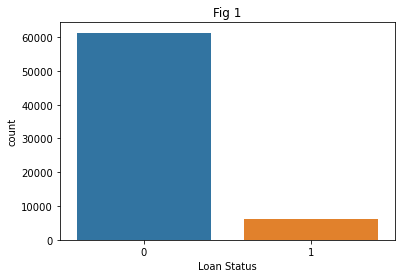

In [18]:
# A highly imbalanced dataset as the countplot indicated 90.75% people have defaulted loan 
# while the remaining 9.25% do not have defaulted loan. 


sns.countplot(trainn["Loan Status"])
plt.title("Fig 1")


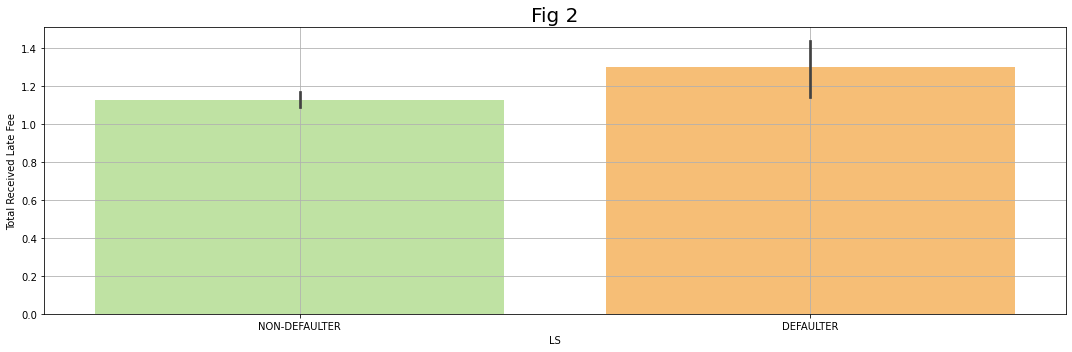

In [19]:
# It becomes very clear from the barplot that a person who is having difficulties making the payment on loans
#and is used to paying a late fee as penalty most fo the time is bound to be a defaulter.

plt.figure(figsize=(15,5))
sns.barplot(x='LS',y='Total Received Late Fee',data= trainn,saturation=0.9, palette='Spectral_r')
plt.title("Fig 2", fontsize=20)
plt.tight_layout()
plt.grid(True)
plt.show()

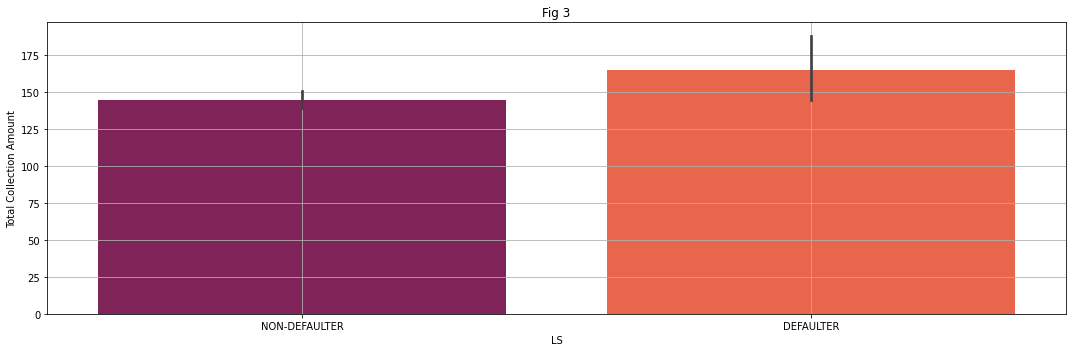

In [20]:
# Total collection amount which is the money collected from borrowers is higher for defaulters whio have defualted on loans then for non-defaulters.

plt.figure(figsize=(15,5))
sns.barplot(x='LS',y='Total Collection Amount',data= trainn,saturation=0.9, palette="rocket")
plt.title("Fig 3")
plt.tight_layout()
plt.grid(True)
plt.show()

In [21]:
# checking the min and max values for the funded amount.
min_number = min(trainn['Funded Amount'])
print(min_number)

max_number = max(trainn['Funded Amount'])
print(max_number)

1014
34999


In [22]:
# created a function to segregate the data into bins for better visualisation.
def FUND_AMT(X):
    if X in range(1000,15000):
        return 'LOW FUNDED'
    if X in range(15000,25000):
        return 'MEDIUM FUNDED'
    else:
        return 'HIGHLY FUNDED'

In [23]:
trainn['FUND_AMT']=trainn['Funded Amount'].apply(FUND_AMT)

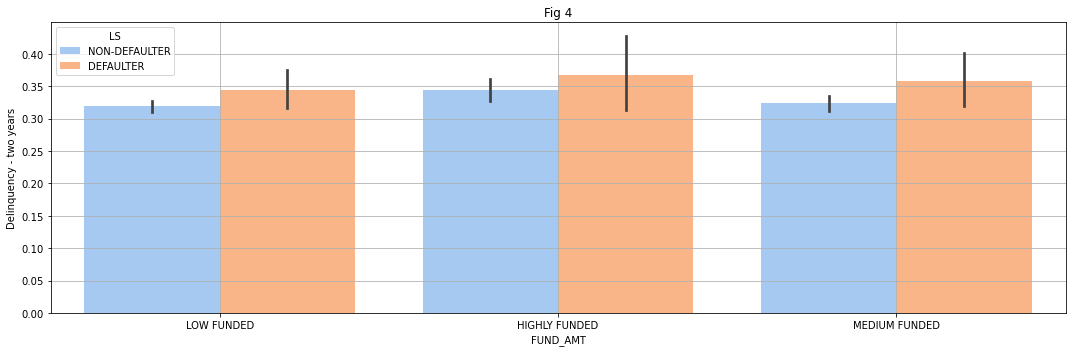

In [24]:
# The barplot attests the fact that the group of people who received high funding amount were the ones who failed to make 
#payment on their debt obligation for the given period of time.
plt.figure(figsize=(15,5))
sns.barplot(x='FUND_AMT',y='Delinquency - two years',hue ='LS',data= trainn,saturation=0.9, palette="pastel")
plt.title("Fig 4")
plt.tight_layout()
plt.grid(True)
plt.show()


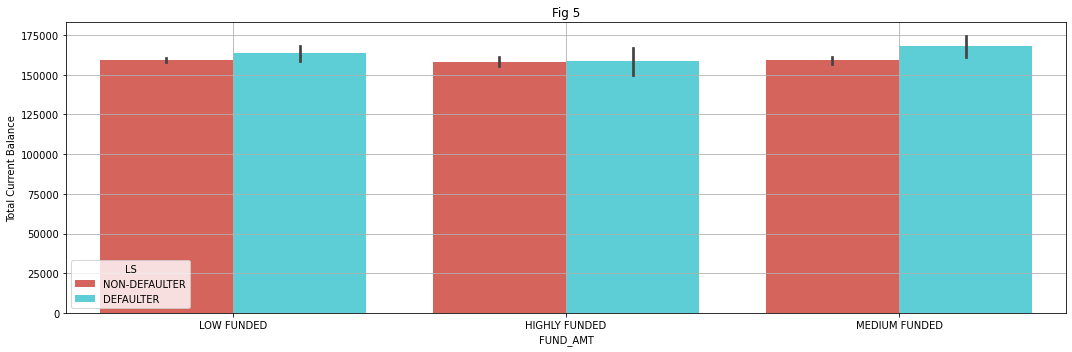

In [25]:
# the defaulters who are have received medium fund amount owe highest amount of money on a loan or credit 
# as of current date compared to low and high funded group.

plt.figure(figsize=(15,5))
sns.barplot(x='FUND_AMT',y='Total Current Balance',hue ='LS',data= trainn,saturation=0.9,palette="hls")
plt.title("Fig 5")
plt.tight_layout()
plt.grid(True)
plt.show()

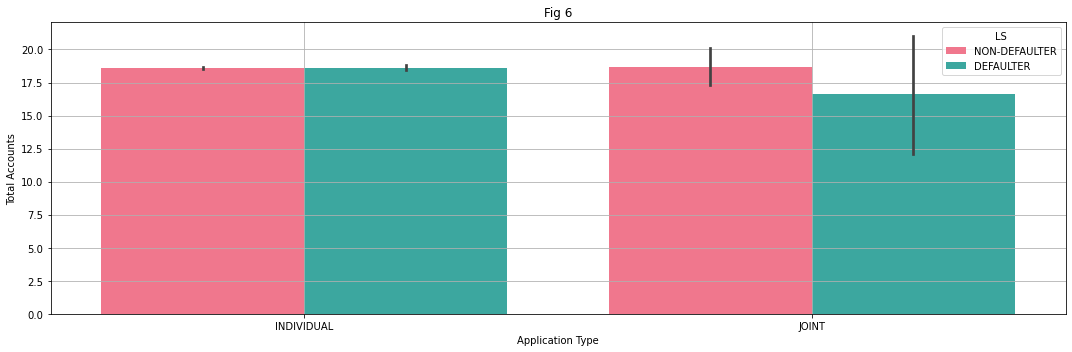

In [26]:
# The people who have individually taken a loan have more no/type of loan accounts as compared to people with joint accounts.

plt.figure(figsize=(15,5))
sns.barplot(x='Application Type',y='Total Accounts',hue ='LS',data= trainn,saturation=0.9,palette= "husl")
plt.title("Fig 6")
plt.tight_layout()
plt.grid(True)
plt.show()

In [212]:
# segregating term period of loans for better visualisation purpose.
def loan_term(Term):
    if Term <= 12:
        return "short-term loan"
    elif Term > 12 and Term <= 36:
        return "medium-term loan"
    else:
        return "long-term loan"

In [213]:
trainn['TERM']=trainn['Term'].apply(loan_term)

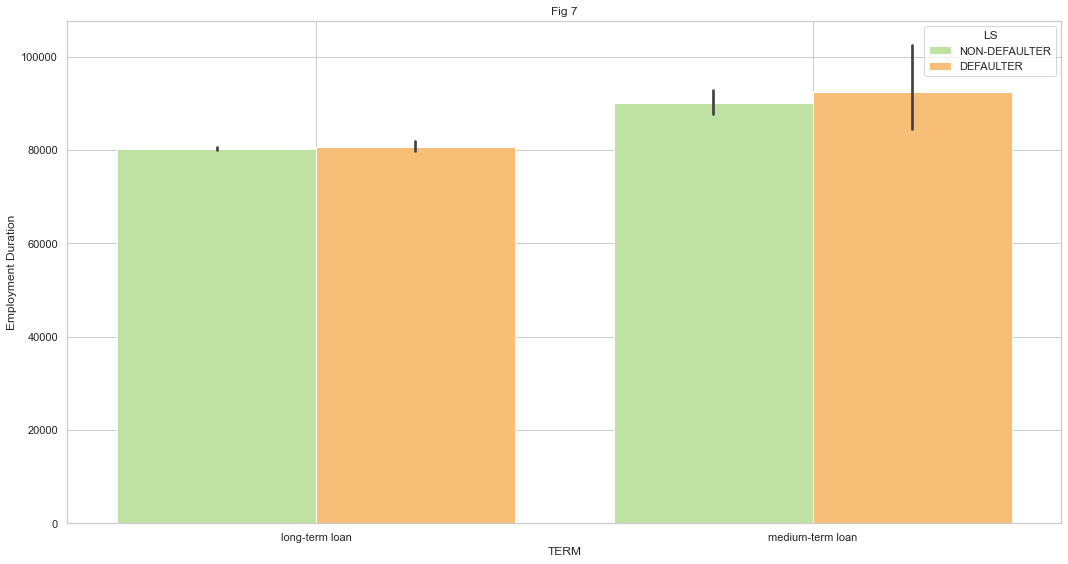

In [214]:
# People who have taken medium term loan but have good paying jobs as indicated by high employment duration are bound to default on their loan more as compared to people taking long term loan 
#having lower employment duration. Medium term loans have high monthly payment which may be challenging for some borrowers to pay on time.

plt.figure(figsize=(15,8))
sns.barplot(x='TERM',y='Employment Duration',hue ="LS",data= trainn,palette='Spectral_r',saturation=0.9)
plt.title("Fig 7")
plt.tight_layout()
plt.grid(True)
plt.show()

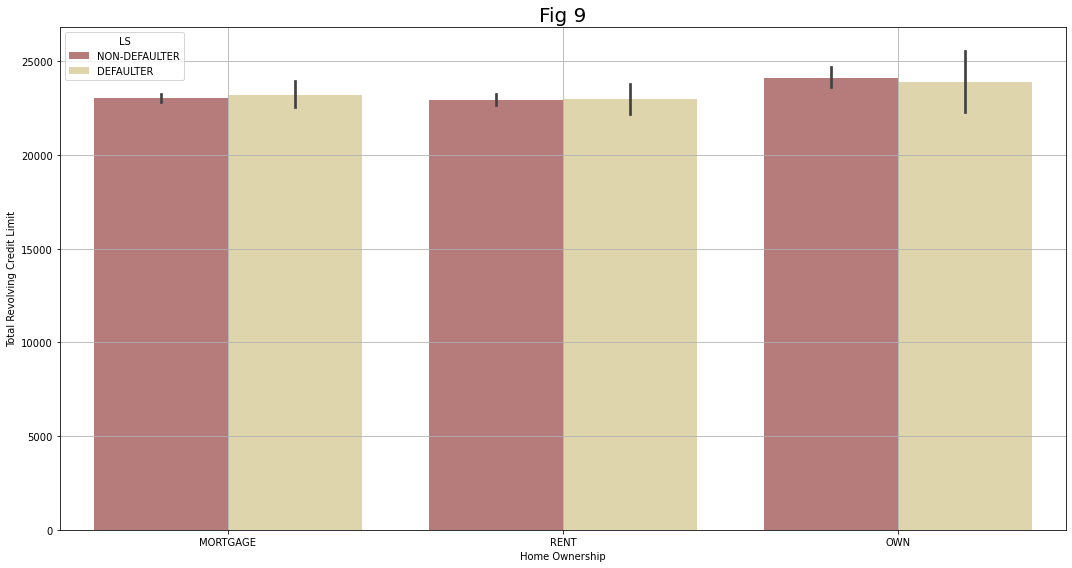

In [31]:
# People who have their legal ownership of a residential property,shows more usage of credit utlisation ratio 
#showing heavy reliance on credit maybe at a risk of defaulting or not.

plt.figure(figsize=(15,8))
sns.barplot(x='Home Ownership',y='Total Revolving Credit Limit',hue ="LS",data= trainn,palette='pink',saturation=0.9)
plt.title("Fig 9", fontsize=20)
plt.tight_layout()
plt.grid(True)
plt.show()

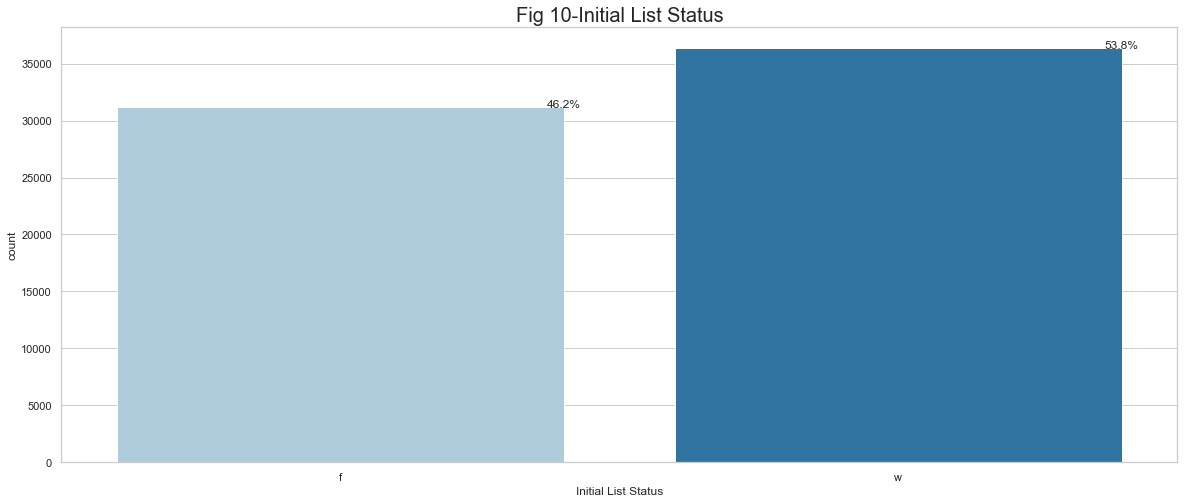

In [32]:
# Initial List status of defaulters, where around 53.8 per cent are in waiting list while the rest forwarded 
#are 46.2 per cent.


sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
total = float(len(trainn))
ax = sns.countplot(x="Initial List Status", data= trainn,palette="Paired")
plt.title('Fig 10-Initial List Status', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

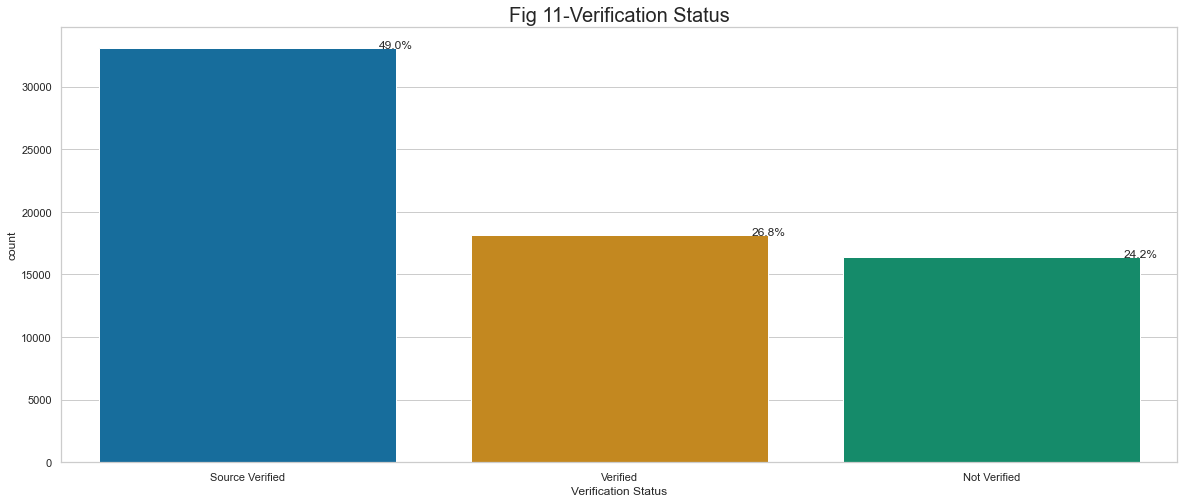

In [215]:
#People who are source verified are the highest to receive loans at around 49 per cent as as lender 
#has independently verified the information provided by the applicant via
#employment verification, bank statements, or other documentation. 


sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
total = float(len(trainn))
ax = sns.countplot(x="Verification Status", data= trainn,palette="colorblind")
plt.title('Fig 11-Verification Status', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

# TEST DATASET

In [39]:
#load test data
test = pd.read_csv('/Users/barnalikkapradhan/Downloads/test.csv') 
test = test.drop(test.columns[0], axis = 1)
test

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,5741.0,33106,9415.906149,59.0,BAT1586599,13.932044,B,C3,RENT,95780.03071,Not Verified,n,Debt consolidation,17.892275,0,0,6,0,18426,58.213716,10,w,8039.869274,0.099954,4.343598,0.547021,0,INDIVIDUAL,15,0,32,72656,23806,NaN
1,15727.0,7527,6383.228567,59.0,BAT4694572,16.304359,A,C2,MORTGAGE,68827.44577,Source Verified,n,Credit card refinancing,23.523395,0,0,25,0,3275,47.455974,21,w,896.788875,0.057733,5.379948,1.156404,0,INDIVIDUAL,109,0,19,308331,48942,NaN
2,12696.0,30917,24948.323960,58.0,BAT1780517,10.679847,F,G1,OWN,57512.02074,Not Verified,n,Debt consolidation,26.929467,0,0,31,2,4318,43.478236,13,w,450.785085,0.027348,3.631716,0.913091,0,INDIVIDUAL,68,0,43,157110,1739,NaN
3,6166.0,21312,12358.982420,59.0,BAT2252229,6.752841,A,B2,MORTGAGE,53187.72375,Verified,n,Credit card refinancing,24.476871,1,0,11,0,11567,47.194553,19,w,1542.454747,0.020215,2.940778,0.758701,0,INDIVIDUAL,103,0,47,88191,6451,NaN
4,30120.0,13948,9630.476527,59.0,BAT2078974,9.265811,C,E2,MORTGAGE,150535.93730,Verified,n,Debt consolidation,22.771853,0,1,20,1,187,75.966130,18,f,9426.932489,0.026347,1.132557,1.136219,0,INDIVIDUAL,105,0,25,15313,7734,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29008,15043.0,28663,15084.416130,58.0,BAT2803411,7.435217,B,B4,OWN,58771.48368,Source Verified,n,Credit card refinancing,25.096344,0,0,13,0,4969,24.655425,30,f,2993.150199,0.063585,6.350805,0.886337,0,INDIVIDUAL,118,0,10,74143,14821,NaN
29009,15000.0,15000,15000.000000,60.0,BAT2803411,18.490000,E,E2,MORTGAGE,39000.00000,Verified,n,Debt consolidation,29.140000,0,2,10,0,10218,45.200000,17,w,215.720000,0.000000,0.000000,0.000000,0,INDIVIDUAL,4,0,0,91434,22600,NaN
29010,32348.0,4681,23387.445320,59.0,BAT2252229,11.347281,C,C2,MORTGAGE,58782.21710,Source Verified,n,Debt Consolidation,16.486184,0,2,11,0,6159,85.915781,21,f,2835.820849,0.047913,3.277516,1.152829,0,INDIVIDUAL,35,0,51,219908,43856,NaN
29011,21185.0,6750,12198.085110,59.0,BAT4694572,12.349347,D,A3,MORTGAGE,51044.88215,Not Verified,n,Credit card refinancing,19.273694,0,0,13,0,295,19.508619,40,f,1297.108563,0.002651,9.199395,1.376197,0,INDIVIDUAL,20,0,8,129411,5163,NaN


In [40]:
# dropped unnecessary columns
TEST = test.drop(['Loan Amount','Loan Status','Loan Title','Funded Amount Investor','Batch Enrolled','Grade','Sub Grade','Payment Plan','Inquires - six months','Open Account','Revolving Utilities','Public Record','Total Received Interest','Total Received Late Fee','Collection Recovery Fee','Collection 12 months Medical','Accounts Delinquent','Last week Pay'],axis=1)
TEST

,Funded Amount,Term,Interest Rate,Home Ownership,Employment Duration,Verification Status,Debit to Income,Delinquency - two years,Revolving Balance,Total Accounts,Initial List Status,Recoveries,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,33106,59.0,13.932044,RENT,95780.03071,Not Verified,17.892275,0,18426,10,w,4.343598,INDIVIDUAL,32,72656,23806
1,7527,59.0,16.304359,MORTGAGE,68827.44577,Source Verified,23.523395,0,3275,21,w,5.379948,INDIVIDUAL,19,308331,48942
2,30917,58.0,10.679847,OWN,57512.02074,Not Verified,26.929467,0,4318,13,w,3.631716,INDIVIDUAL,43,157110,1739
3,21312,59.0,6.752841,MORTGAGE,53187.72375,Verified,24.476871,1,11567,19,w,2.940778,INDIVIDUAL,47,88191,6451
4,13948,59.0,9.265811,MORTGAGE,150535.93730,Verified,22.771853,0,187,18,f,1.132557,INDIVIDUAL,25,15313,7734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29008,28663,58.0,7.435217,OWN,58771.48368,Source Verified,25.096344,0,4969,30,f,6.350805,INDIVIDUAL,10,74143,14821
29009,15000,60.0,18.490000,MORTGAGE,39000.00000,Verified,29.140000,0,10218,17,w,0.000000,INDIVIDUAL,0,91434,22600
29010,4681,59.0,11.347281,MORTGAGE,58782.21710,Source Verified,16.486184,0,6159,21,f,3.277516,INDIVIDUAL,51,219908,43856
29011,6750,59.0,12.349347,MORTGAGE,51044.88215,Not Verified,19.273694,0,295,40,f,9.199395,INDIVIDUAL,8,129411,5163


In [41]:

TEST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29013 entries, 0 to 29012
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Funded Amount                 29013 non-null  int64  
 1   Term                          28668 non-null  float64
 2   Interest Rate                 29013 non-null  float64
 3   Home Ownership                29013 non-null  object 
 4   Employment Duration           29013 non-null  float64
 5   Verification Status           29013 non-null  object 
 6   Debit to Income               29013 non-null  float64
 7   Delinquency - two years       29013 non-null  int64  
 8   Revolving Balance             29013 non-null  int64  
 9   Total Accounts                29013 non-null  int64  
 10  Initial List Status           29013 non-null  object 
 11  Recoveries                    29013 non-null  float64
 12  Application Type              29013 non-null  object 
 13  T

In [42]:
# Just like in train dataset here also in test datset the term period has missing values.
TEST.isnull().sum()

Funded Amount                     0
Term                            345
Interest Rate                     0
Home Ownership                    0
Employment Duration               0
Verification Status               0
Debit to Income                   0
Delinquency - two years           0
Revolving Balance                 0
Total Accounts                    0
Initial List Status               0
Recoveries                        0
Application Type                  0
Total Collection Amount           0
Total Current Balance             0
Total Revolving Credit Limit      0
dtype: int64

In [43]:
TEST.shape

(29013, 16)

In [44]:
TEST.describe()

,Funded Amount,Term,Interest Rate,Employment Duration,Debit to Income,Delinquency - two years,Revolving Balance,Total Accounts,Recoveries,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
count,29013.000000,28668.000000,29013.000000,29013.000000,29013.000000,29013.000000,29013.000000,29013.000000,29013.000000,29013.000000,2.901300e+04,29013.000000
mean,15623.598801,54.534498,12.187000,79962.748875,22.153839,0.331989,9934.811085,20.397994,50.692603,160.025850,1.531399e+05,25018.172612
std,8230.885798,8.998286,3.909527,45195.819544,8.658484,0.818246,10926.166261,9.650892,336.754492,913.335194,1.393180e+05,22294.627159
min,1000.000000,36.000000,5.320000,14907.925920,0.730000,0.000000,0.000000,4.000000,0.000000,0.000000,6.260000e+02,1000.000000
25%,9175.000000,58.000000,9.424459,50791.000000,15.617313,0.000000,3175.000000,14.000000,0.000000,3.000000,4.397100e+04,9322.000000
50%,13200.000000,59.000000,11.686414,68873.349740,21.520000,0.000000,6769.000000,19.000000,2.163523,30.000000,1.092860e+05,18852.000000
75%,21559.000000,59.000000,14.640000,94667.954560,28.835598,0.000000,12803.000000,25.000000,4.606350,44.000000,2.223770e+05,33860.000000
max,35000.000000,60.000000,27.310000,406944.859000,39.629977,9.000000,188657.000000,73.000000,4325.594909,27076.000000,1.183282e+06,233500.000000


In [45]:
TEST[TEST.duplicated()]

,Funded Amount,Term,Interest Rate,Home Ownership,Employment Duration,Verification Status,Debit to Income,Delinquency - two years,Revolving Balance,Total Accounts,Initial List Status,Recoveries,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
5237,22331,59.0,15.007620,OWN,142417.55220,Source Verified,38.030805,0,347,15,f,3485.447136,INDIVIDUAL,911,1183282,21269
6848,7500,36.0,9.170000,MORTGAGE,68000.00000,Source Verified,13.950000,2,9302,31,f,0.000000,INDIVIDUAL,0,45870,15500
7474,16963,60.0,11.086937,MORTGAGE,52338.66421,Source Verified,28.686345,2,1476,16,f,5.433289,INDIVIDUAL,26,286232,95024
7968,14986,59.0,5.326343,OWN,62005.29179,Not Verified,11.510855,1,4736,25,w,1.427789,INDIVIDUAL,30,176212,79629
8426,22878,59.0,9.855541,MORTGAGE,37317.57559,Verified,25.608576,2,2610,22,w,3.018710,INDIVIDUAL,25,136389,33562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27798,21013,58.0,12.523005,RENT,76149.11372,Source Verified,25.466224,1,3130,23,w,2.964983,INDIVIDUAL,15,541510,5406
27915,7788,59.0,14.536356,RENT,147317.42020,Source Verified,21.292768,0,2170,26,f,4.039596,INDIVIDUAL,553,48750,17248
27961,16830,59.0,16.063190,RENT,93162.05916,Source Verified,18.655799,0,4185,21,f,4.190826,INDIVIDUAL,49,97763,5098
28027,12000,36.0,15.310000,MORTGAGE,90000.00000,Not Verified,17.590000,2,12649,41,w,0.000000,INDIVIDUAL,0,279762,21900


In [46]:
TEST.drop_duplicates(inplace = True)
TEST

,Funded Amount,Term,Interest Rate,Home Ownership,Employment Duration,Verification Status,Debit to Income,Delinquency - two years,Revolving Balance,Total Accounts,Initial List Status,Recoveries,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,33106,59.0,13.932044,RENT,95780.03071,Not Verified,17.892275,0,18426,10,w,4.343598,INDIVIDUAL,32,72656,23806
1,7527,59.0,16.304359,MORTGAGE,68827.44577,Source Verified,23.523395,0,3275,21,w,5.379948,INDIVIDUAL,19,308331,48942
2,30917,58.0,10.679847,OWN,57512.02074,Not Verified,26.929467,0,4318,13,w,3.631716,INDIVIDUAL,43,157110,1739
3,21312,59.0,6.752841,MORTGAGE,53187.72375,Verified,24.476871,1,11567,19,w,2.940778,INDIVIDUAL,47,88191,6451
4,13948,59.0,9.265811,MORTGAGE,150535.93730,Verified,22.771853,0,187,18,f,1.132557,INDIVIDUAL,25,15313,7734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29008,28663,58.0,7.435217,OWN,58771.48368,Source Verified,25.096344,0,4969,30,f,6.350805,INDIVIDUAL,10,74143,14821
29009,15000,60.0,18.490000,MORTGAGE,39000.00000,Verified,29.140000,0,10218,17,w,0.000000,INDIVIDUAL,0,91434,22600
29010,4681,59.0,11.347281,MORTGAGE,58782.21710,Source Verified,16.486184,0,6159,21,f,3.277516,INDIVIDUAL,51,219908,43856
29011,6750,59.0,12.349347,MORTGAGE,51044.88215,Not Verified,19.273694,0,295,40,f,9.199395,INDIVIDUAL,8,129411,5163


In [47]:
#seperate into categorical & numerical columns
numerical_col = [fea for fea in TEST.columns if TEST[fea].dtype !='O']
print("Numerical columns --",numerical_col)

Numerical columns -- ['Funded Amount', 'Term', 'Interest Rate', 'Employment Duration', 'Debit to Income', 'Delinquency - two years', 'Revolving Balance', 'Total Accounts', 'Recoveries', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit']


In [48]:
categorical_col = [fea for fea in TEST.columns if TEST[fea].dtype =='O']
print("Categorical columns --",categorical_col)

Categorical columns -- ['Home Ownership', 'Verification Status', 'Initial List Status', 'Application Type']


# FEATURE ENGINEERING PROCESS BOTH FOR TRAIN AND TEST DATASET

## USING IQR METHOD FOR OUTLIER DETECTION AND CAPPING THE OUTLIERS FOR TRAIN DATASET

## Funded amount

<AxesSubplot:xlabel='Funded Amount'>

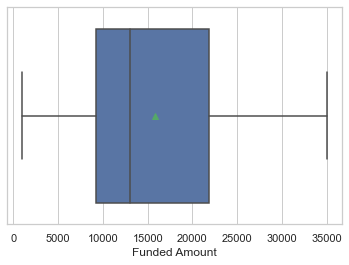

In [49]:
# Funded amount had no outliers.
sns.boxplot(x='Funded Amount',data= TRAIN,showmeans=True)

## Interest Rate

<AxesSubplot:xlabel='Interest Rate'>

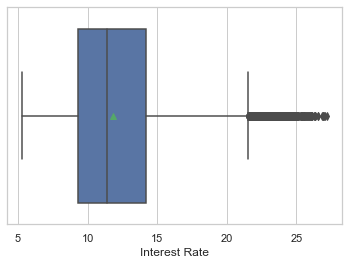

In [50]:
# Shows presence of outliers on right hand side i.e larger value side.
sns.boxplot(x='Interest Rate',data= TRAIN,showmeans=True)

In [51]:
# Uisng interquartile method to find the outliers and cap them.
Q1 = TRAIN['Interest Rate'].quantile(0.25)
Q3 = TRAIN['Interest Rate'].quantile(0.75)
Q1,Q3

(9.297123882, 14.19336906)

In [52]:
IQR = Q3-Q1
IQR

4.896245178000001

In [53]:
LOWER_LIMIT = Q1-1.5*IQR
UPPER_LIMIT = Q3+1.5*IQR
LOWER_LIMIT, UPPER_LIMIT

(1.952756114999998, 21.537736827000003)

In [54]:
TRAIN['Interest Rate']= np.where(TRAIN['Interest Rate']>UPPER_LIMIT,UPPER_LIMIT,
                             np.where(TRAIN['Interest Rate']<LOWER_LIMIT,LOWER_LIMIT,TRAIN['Interest Rate']))

<AxesSubplot:xlabel='Interest Rate'>

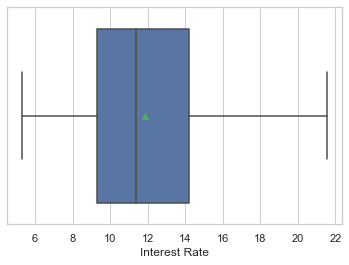

In [55]:
sns.boxplot(x='Interest Rate',data= TRAIN,showmeans=True)

## Debit to Income

<AxesSubplot:xlabel='Debit to Income'>

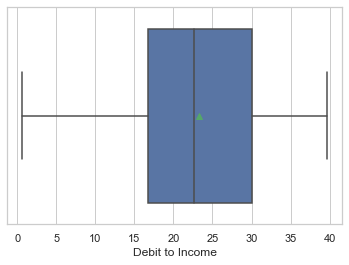

In [56]:
# Shows no presence of outliers 
sns.boxplot(x='Debit to Income',data= TRAIN,showmeans=True)

## Revolving Balance

<AxesSubplot:xlabel='Revolving Balance'>

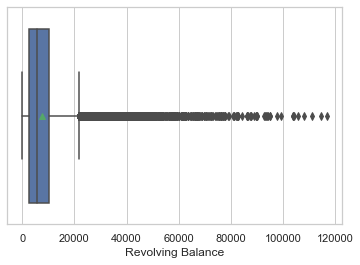

In [57]:
# Shows presence of outliers on right hand side i.e larger value side.
sns.boxplot(x='Revolving Balance',data= TRAIN,showmeans=True)

In [58]:
# Use IQR method to find outliers and cap them
Q1 = TRAIN['Revolving Balance'].quantile(0.25)
Q3 = TRAIN['Revolving Balance'].quantile(0.75)
Q1,Q3

(2557.0, 10185.0)

In [59]:
IQR = Q3-Q1
IQR

7628.0

In [60]:
LOWER_LIMIT = Q1-1.5*IQR
UPPER_LIMIT = Q3+1.5*IQR
LOWER_LIMIT, UPPER_LIMIT

(-8885.0, 21627.0)

In [61]:
TRAIN['Revolving Balance']= np.where(TRAIN['Revolving Balance']>UPPER_LIMIT,UPPER_LIMIT,
                             np.where(TRAIN['Revolving Balance']<LOWER_LIMIT,LOWER_LIMIT,TRAIN['Revolving Balance']))


<AxesSubplot:xlabel='Revolving Balance'>

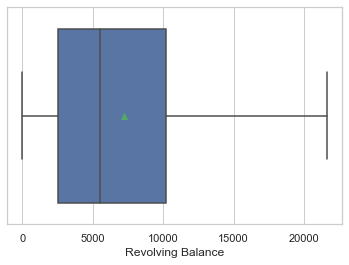

In [62]:
sns.boxplot(x='Revolving Balance',data= TRAIN,showmeans=True)

## Recoveries

<AxesSubplot:xlabel='Recoveries'>

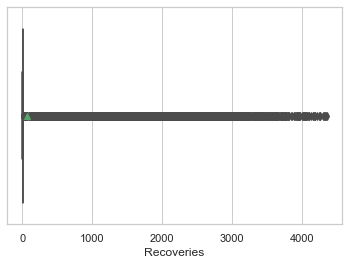

In [63]:
sns.boxplot(x='Recoveries',data= TRAIN,showmeans=True)

In [64]:
Q1 = TRAIN['Recoveries'].quantile(0.25)
Q3 = TRAIN['Recoveries'].quantile(0.75)
Q1,Q3

(1.62979091, 5.453685981)

In [65]:
IQR = Q3-Q1
IQR

3.8238950709999995

In [66]:
LOWER_LIMIT = Q1-1.5*IQR
UPPER_LIMIT = Q3+1.5*IQR
LOWER_LIMIT, UPPER_LIMIT

(-4.1060516965, 11.1895285875)

In [67]:
TRAIN['Recoveries']= np.where(TRAIN['Recoveries']>UPPER_LIMIT,UPPER_LIMIT,
                             np.where(TRAIN['Recoveries']<LOWER_LIMIT,LOWER_LIMIT,TRAIN['Recoveries']))


<AxesSubplot:xlabel='Recoveries'>

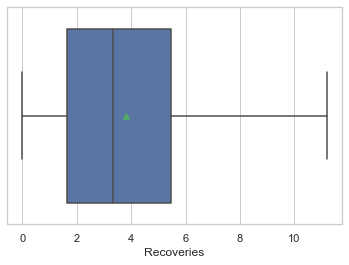

In [68]:
sns.boxplot(x='Recoveries',data= TRAIN,showmeans=True)

## Total Collection Amount

<AxesSubplot:xlabel='Total Collection Amount'>

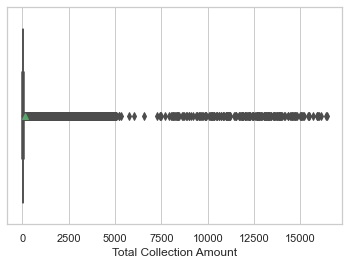

In [69]:
sns.boxplot(x='Total Collection Amount',data= TRAIN,showmeans=True)

In [70]:
Q1 = TRAIN['Total Collection Amount'].quantile(0.25)
Q3 = TRAIN['Total Collection Amount'].quantile(0.75)
Q1,Q3


(24.0, 46.0)

In [71]:
IQR = Q3-Q1
IQR

22.0

In [72]:
LOWER_LIMIT = Q1-1.5*IQR
UPPER_LIMIT = Q3+1.5*IQR
LOWER_LIMIT, UPPER_LIMIT

(-9.0, 79.0)

In [73]:
TRAIN['Total Collection Amount']= np.where(TRAIN['Total Collection Amount']>UPPER_LIMIT,UPPER_LIMIT,
                             np.where(TRAIN['Total Collection Amount']<LOWER_LIMIT,LOWER_LIMIT,TRAIN['Total Collection Amount']))


<AxesSubplot:xlabel='Total Collection Amount'>

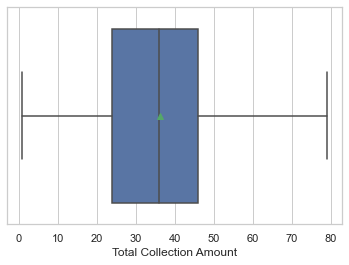

In [74]:
sns.boxplot(x='Total Collection Amount',data= TRAIN,showmeans=True)

# Total Current Balance

<AxesSubplot:xlabel='Total Current Balance'>

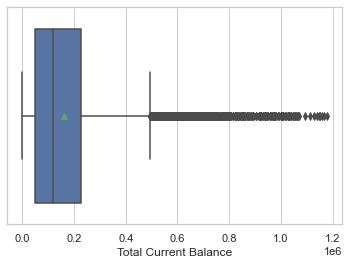

In [75]:
sns.boxplot(x='Total Current Balance',data= TRAIN,showmeans=True)

In [76]:
Q1 = TRAIN['Total Current Balance'].quantile(0.25)
Q3 = TRAIN['Total Current Balance'].quantile(0.75)
Q1,Q3

(50378.0, 228385.0)

In [77]:
IQR = Q3-Q1
IQR

178007.0

In [78]:
LOWER_LIMIT = Q1-1.5*IQR
UPPER_LIMIT = Q3+1.5*IQR
LOWER_LIMIT, UPPER_LIMIT


(-216632.5, 495395.5)

In [79]:
TRAIN['Total Current Balance']= np.where(TRAIN['Total Current Balance']>UPPER_LIMIT,UPPER_LIMIT,
                             np.where(TRAIN['Total Current Balance']<LOWER_LIMIT,LOWER_LIMIT,TRAIN['Total Current Balance']))

<AxesSubplot:xlabel='Total Current Balance'>

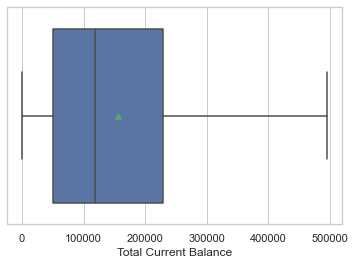

In [80]:

sns.boxplot(x='Total Current Balance',data= TRAIN,showmeans=True)

## Total Revolving Credit Limit

<AxesSubplot:xlabel='Total Revolving Credit Limit'>

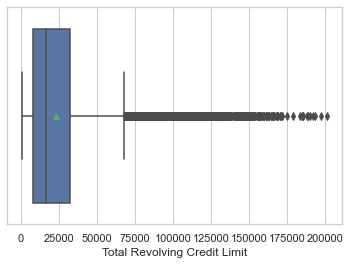

In [81]:
sns.boxplot(x='Total Revolving Credit Limit',data= TRAIN,showmeans=True)

In [82]:
Q1 = TRAIN['Total Revolving Credit Limit'].quantile(0.25)
Q3 = TRAIN['Total Revolving Credit Limit'].quantile(0.75)
Q1,Q3


(8155.0, 32145.0)

In [83]:
IQR = Q3-Q1
IQR

23990.0

In [84]:
LOWER_LIMIT = Q1-1.5*IQR
UPPER_LIMIT = Q3+1.5*IQR
LOWER_LIMIT, UPPER_LIMIT


(-27830.0, 68130.0)

In [85]:
TRAIN['Total Revolving Credit Limit']= np.where(TRAIN['Total Revolving Credit Limit']>UPPER_LIMIT,UPPER_LIMIT,
                             np.where(TRAIN['Total Revolving Credit Limit']<LOWER_LIMIT,LOWER_LIMIT,TRAIN['Total Revolving Credit Limit']))


<AxesSubplot:xlabel='Total Revolving Credit Limit'>

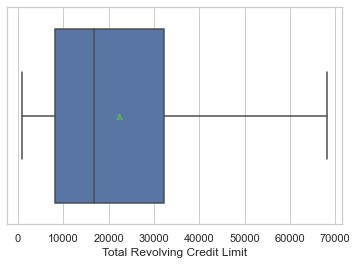

In [86]:
sns.boxplot(x='Total Revolving Credit Limit',data= TRAIN,showmeans=True)

# USING IQR METHOD FOR CHECKING OUTLIERS & CAPPING THEM FOR TEST DATASET

# Funded Amount

<AxesSubplot:xlabel='Funded Amount'>

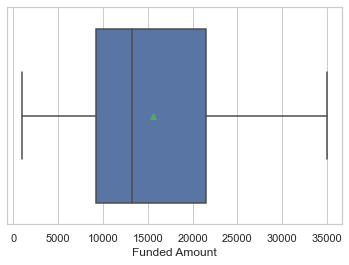

In [87]:
sns.boxplot(x='Funded Amount',data= TEST,showmeans=True)

## Interest Rate

<AxesSubplot:xlabel='Interest Rate'>

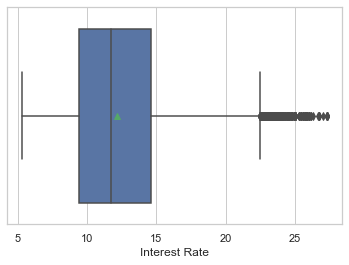

In [88]:
sns.boxplot(x='Interest Rate',data= TEST,showmeans=True)

In [89]:
Q1 = TEST['Interest Rate'].quantile(0.25)
Q3 = TEST['Interest Rate'].quantile(0.75)
Q1,Q3

(9.422245003, 14.64)

In [90]:
IQR = Q3-Q1
IQR

5.217754997

In [91]:
LOWER_LIMIT = Q1-1.5*IQR
UPPER_LIMIT = Q3+1.5*IQR
LOWER_LIMIT, UPPER_LIMIT

(1.5956125075000003, 22.4666324955)

In [92]:
TEST['Interest Rate']= np.where(TEST['Interest Rate']>UPPER_LIMIT,UPPER_LIMIT,
                             np.where(TEST['Interest Rate']<LOWER_LIMIT,LOWER_LIMIT,TEST['Interest Rate']))

<AxesSubplot:xlabel='Interest Rate'>

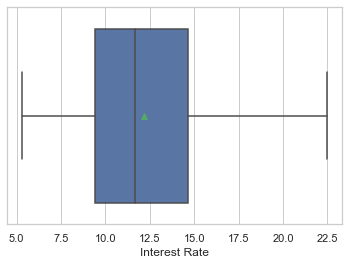

In [93]:
sns.boxplot(x='Interest Rate',data= TEST,showmeans=True)

# Debit to Income 

<AxesSubplot:xlabel='Debit to Income'>

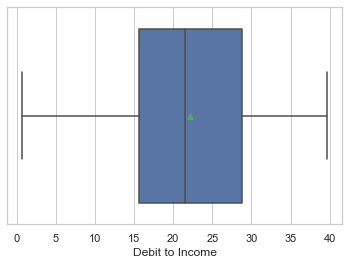

In [94]:
sns.boxplot(x='Debit to Income',data= TEST,showmeans=True)

## Revolving Balance

<AxesSubplot:xlabel='Revolving Balance'>

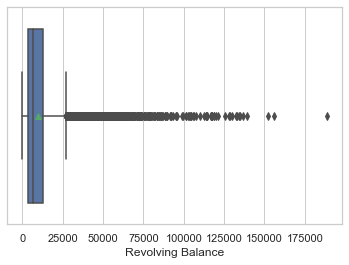

In [95]:
sns.boxplot(x='Revolving Balance',data= TEST,showmeans=True)

In [96]:
Q1 = TEST['Revolving Balance'].quantile(0.25)
Q3 = TEST['Revolving Balance'].quantile(0.75)
Q1,Q3

(3177.25, 12802.75)

In [97]:
IQR = Q3-Q1
IQR

9625.5

In [98]:
LOWER_LIMIT = Q1-1.5*IQR
UPPER_LIMIT = Q3+1.5*IQR
LOWER_LIMIT, UPPER_LIMIT

(-11261.0, 27241.0)

In [99]:
TEST['Revolving Balance']= np.where(TEST['Revolving Balance']>UPPER_LIMIT,UPPER_LIMIT,
                             np.where(TEST['Revolving Balance']<LOWER_LIMIT,LOWER_LIMIT,TEST['Revolving Balance']))


<AxesSubplot:xlabel='Revolving Balance'>

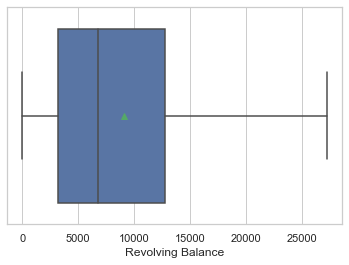

In [100]:
sns.boxplot(x='Revolving Balance',data= TEST,showmeans=True)

# Recoveries

<AxesSubplot:xlabel='Recoveries'>

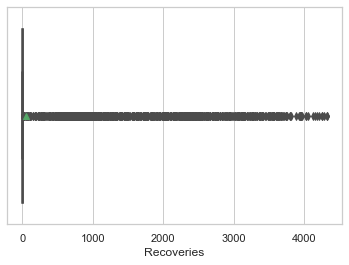

In [101]:
sns.boxplot(x='Recoveries',data= TEST,showmeans=True)

In [102]:
Q1 = TEST['Recoveries'].quantile(0.25)
Q3 = TEST['Recoveries'].quantile(0.75)
Q1,Q3

(0.0, 4.61003565175)

In [103]:
IQR = Q3-Q1
IQR

4.61003565175

In [104]:
LOWER_LIMIT = Q1-1.5*IQR
UPPER_LIMIT = Q3+1.5*IQR
LOWER_LIMIT, UPPER_LIMIT

(-6.9150534776249994, 11.525089129374999)

In [105]:
TEST['Recoveries']= np.where(TEST['Recoveries']>UPPER_LIMIT,UPPER_LIMIT,
                             np.where(TEST['Recoveries']<LOWER_LIMIT,LOWER_LIMIT,TEST['Recoveries']))

<AxesSubplot:xlabel='Recoveries'>

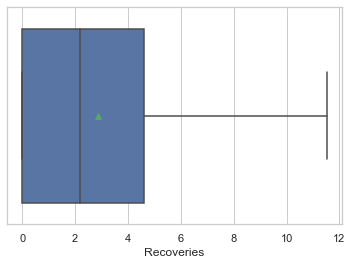

In [106]:

sns.boxplot(x='Recoveries',data= TEST,showmeans=True)

# Total Collection Amount

<AxesSubplot:xlabel='Total Collection Amount'>

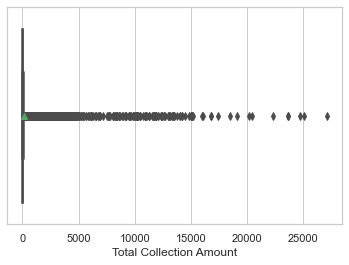

In [107]:
sns.boxplot(x='Total Collection Amount',data= TEST,showmeans=True)

In [108]:
Q1 = TEST['Total Collection Amount'].quantile(0.25)
Q3 = TEST['Total Collection Amount'].quantile(0.75)
Q1,Q3

(3.0, 44.0)

In [109]:
IQR = Q3-Q1
IQR

41.0

In [110]:
LOWER_LIMIT = Q1-1.5*IQR
UPPER_LIMIT = Q3+1.5*IQR
LOWER_LIMIT, UPPER_LIMIT

(-58.5, 105.5)

In [111]:
TEST['Total Collection Amount']= np.where(TEST['Total Collection Amount']>UPPER_LIMIT,UPPER_LIMIT,
                             np.where(TEST['Total Collection Amount']<LOWER_LIMIT,LOWER_LIMIT,TEST['Total Collection Amount']))

<AxesSubplot:xlabel='Total Collection Amount'>

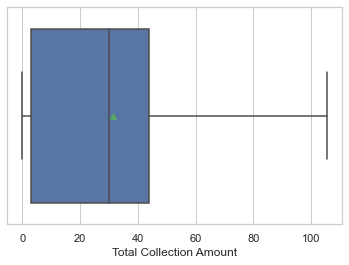

In [112]:
sns.boxplot(x='Total Collection Amount',data= TEST,showmeans=True)

# Total Current Balance

<AxesSubplot:xlabel='Total Current Balance'>

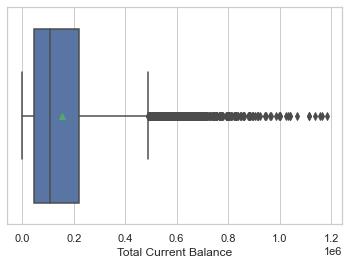

In [113]:
sns.boxplot(x='Total Current Balance',data= TEST,showmeans=True)

In [114]:
Q1 = TEST['Total Current Balance'].quantile(0.25)
Q3 = TEST['Total Current Balance'].quantile(0.75)
Q1,Q3


(43972.25, 222295.25)

In [115]:
IQR = Q3-Q1
IQR

178323.0

In [116]:
LOWER_LIMIT = Q1-1.5*IQR
UPPER_LIMIT = Q3+1.5*IQR
LOWER_LIMIT, UPPER_LIMIT


(-223512.25, 489779.75)

In [117]:
TEST['Total Current Balance']= np.where(TEST['Total Current Balance']>UPPER_LIMIT,UPPER_LIMIT,
                             np.where(TEST['Total Current Balance']<LOWER_LIMIT,LOWER_LIMIT,TEST['Total Current Balance']))


<AxesSubplot:xlabel='Total Current Balance'>

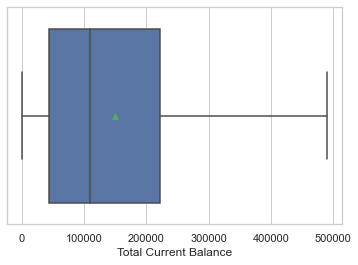

In [118]:

sns.boxplot(x='Total Current Balance',data= TEST,showmeans=True)

# Total Revolving Credit Limit 

<AxesSubplot:xlabel='Total Revolving Credit Limit'>

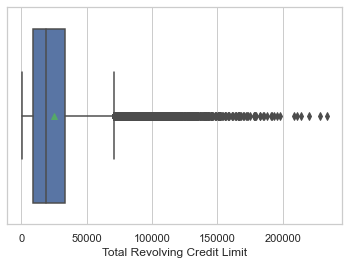

In [119]:
sns.boxplot(x='Total Revolving Credit Limit',data= TEST,showmeans=True)

In [120]:
Q1 = TEST['Total Revolving Credit Limit'].quantile(0.25)
Q3 = TEST['Total Revolving Credit Limit'].quantile(0.75)
Q1,Q3

(9326.0, 33861.5)

In [121]:

IQR = Q3-Q1
IQR

24535.5

In [122]:
LOWER_LIMIT = Q1-1.5*IQR
UPPER_LIMIT = Q3+1.5*IQR
LOWER_LIMIT, UPPER_LIMIT

(-27477.25, 70664.75)

In [123]:
TEST['Total Revolving Credit Limit']= np.where(TEST['Total Revolving Credit Limit']>UPPER_LIMIT,UPPER_LIMIT,
                             np.where(TEST['Total Revolving Credit Limit']<LOWER_LIMIT,LOWER_LIMIT,TEST['Total Revolving Credit Limit']))


<AxesSubplot:xlabel='Total Revolving Credit Limit'>

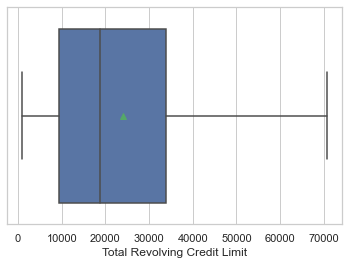

In [124]:
sns.boxplot(x='Total Revolving Credit Limit',data= TEST,showmeans=True)

# MISSING VALUES REPLACE IN TERMS(DURATION OF PAYMEN TOF LOANS) FOR TRAIN DATA

In [125]:
TRAIN.isnull().sum()

Funded Amount                     0
Term                            880
Interest Rate                     0
Home Ownership                    0
Employment Duration               0
Verification Status               0
Loan Title                        0
Debit to Income                   0
Delinquency - two years           0
Revolving Balance                 0
Total Accounts                    0
Initial List Status               0
Recoveries                        0
Application Type                  0
Total Collection Amount           0
Total Current Balance             0
Total Revolving Credit Limit      0
Loan Status                       0
dtype: int64

In [126]:
# we usually use mode to fill missing values in classification problems.
val= TRAIN['Term'].mode()
TRAIN['Term'].fillna(value=val[0],inplace = True)
TRAIN

,Funded Amount,Term,Interest Rate,Home Ownership,Employment Duration,Verification Status,Loan Title,Debit to Income,Delinquency - two years,Revolving Balance,Total Accounts,Initial List Status,Recoveries,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,11760,59.0,16.200249,MORTGAGE,67374.95410,Source Verified,Credit card refinancing,25.780390,0,1670.0,33,f,0.040202,INDIVIDUAL,50.0,48379.0,4599.0,0
1,25543,59.0,11.592735,RENT,25818.51668,Source Verified,Debt consolidation,24.154811,0,2659.0,23,f,5.249225,INDIVIDUAL,79.0,211574.0,20791.0,0
2,9717,58.0,10.963143,MORTGAGE,126202.81660,Source Verified,Credit card refinancing,23.457116,0,10290.0,39,w,2.846310,INDIVIDUAL,14.0,313080.0,25499.0,0
3,32262,59.0,11.372651,RENT,47273.49080,Source Verified,Credit card refinancing,13.156569,0,1364.0,6,f,5.314602,INDIVIDUAL,42.0,98679.0,15270.0,0
4,22241,59.0,8.885435,RENT,35144.68346,Verified,Credit card refinancing,19.846101,7,8739.0,9,w,4.131232,INDIVIDUAL,79.0,495395.5,22000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67558,7800,59.0,11.167840,RENT,51005.37247,Not Verified,Debt Consolidation,26.713031,0,2184.0,19,w,5.023079,INDIVIDUAL,40.0,13265.0,24302.0,1
67559,21983,58.0,9.113640,RENT,64894.40877,Source Verified,Debt consolidation,20.431618,0,2539.0,19,w,4.562045,INDIVIDUAL,53.0,65532.0,24945.0,1
67560,15981,59.0,12.296416,MORTGAGE,45291.29769,Source Verified,Debt consolidation,19.794152,0,234.0,4,f,1.343841,INDIVIDUAL,17.0,30131.0,6149.0,0
67561,23476,59.0,12.970257,RENT,82517.67835,Not Verified,Credit card refinancing,15.222310,1,7135.0,20,w,4.027871,INDIVIDUAL,31.0,306139.0,7609.0,0


In [127]:
# finally removed missing values
TRAIN.isnull().sum()

Funded Amount                   0
Term                            0
Interest Rate                   0
Home Ownership                  0
Employment Duration             0
Verification Status             0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Revolving Balance               0
Total Accounts                  0
Initial List Status             0
Recoveries                      0
Application Type                0
Total Collection Amount         0
Total Current Balance           0
Total Revolving Credit Limit    0
Loan Status                     0
dtype: int64

# MISSING VLAUES FOR TEST DATA

In [128]:
TEST.isnull().sum()

Funded Amount                     0
Term                            345
Interest Rate                     0
Home Ownership                    0
Employment Duration               0
Verification Status               0
Debit to Income                   0
Delinquency - two years           0
Revolving Balance                 0
Total Accounts                    0
Initial List Status               0
Recoveries                        0
Application Type                  0
Total Collection Amount           0
Total Current Balance             0
Total Revolving Credit Limit      0
dtype: int64

In [129]:
val= TEST['Term'].mode()
TEST['Term'].fillna(value=val[0],inplace = True)
TEST

,Funded Amount,Term,Interest Rate,Home Ownership,Employment Duration,Verification Status,Debit to Income,Delinquency - two years,Revolving Balance,Total Accounts,Initial List Status,Recoveries,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,33106,59.0,13.932044,RENT,95780.03071,Not Verified,17.892275,0,18426.0,10,w,4.343598,INDIVIDUAL,32.0,72656.0,23806.0
1,7527,59.0,16.304359,MORTGAGE,68827.44577,Source Verified,23.523395,0,3275.0,21,w,5.379948,INDIVIDUAL,19.0,308331.0,48942.0
2,30917,58.0,10.679847,OWN,57512.02074,Not Verified,26.929467,0,4318.0,13,w,3.631716,INDIVIDUAL,43.0,157110.0,1739.0
3,21312,59.0,6.752841,MORTGAGE,53187.72375,Verified,24.476871,1,11567.0,19,w,2.940778,INDIVIDUAL,47.0,88191.0,6451.0
4,13948,59.0,9.265811,MORTGAGE,150535.93730,Verified,22.771853,0,187.0,18,f,1.132557,INDIVIDUAL,25.0,15313.0,7734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29008,28663,58.0,7.435217,OWN,58771.48368,Source Verified,25.096344,0,4969.0,30,f,6.350805,INDIVIDUAL,10.0,74143.0,14821.0
29009,15000,60.0,18.490000,MORTGAGE,39000.00000,Verified,29.140000,0,10218.0,17,w,0.000000,INDIVIDUAL,0.0,91434.0,22600.0
29010,4681,59.0,11.347281,MORTGAGE,58782.21710,Source Verified,16.486184,0,6159.0,21,f,3.277516,INDIVIDUAL,51.0,219908.0,43856.0
29011,6750,59.0,12.349347,MORTGAGE,51044.88215,Not Verified,19.273694,0,295.0,40,f,9.199395,INDIVIDUAL,8.0,129411.0,5163.0


In [130]:
TEST.isnull().sum()

Funded Amount                   0
Term                            0
Interest Rate                   0
Home Ownership                  0
Employment Duration             0
Verification Status             0
Debit to Income                 0
Delinquency - two years         0
Revolving Balance               0
Total Accounts                  0
Initial List Status             0
Recoveries                      0
Application Type                0
Total Collection Amount         0
Total Current Balance           0
Total Revolving Credit Limit    0
dtype: int64

# ENCODING CATEGORICAL VARIABLES FOR TRAIN DATA

In [131]:
categorical_col = [fea for fea in TRAIN.columns if TRAIN[fea].dtype =='O']
print("Categorical columns --",categorical_col)

Categorical columns -- ['Home Ownership', 'Verification Status', 'Loan Title', 'Initial List Status', 'Application Type']


In [133]:
TRAIN['Home Ownership'].value_counts()

MORTGAGE    36352
RENT        24150
OWN          6963
Name: Home Ownership, dtype: int64

In [134]:
dic = {'MORTGAGE': 0, 'RENT': 1, 'OWN': 2}
TRAIN["Home Ownership"] = TRAIN["Home Ownership"].map(dic)

In [135]:
TRAIN['Home Ownership'].value_counts()

0    36352
1    24150
2     6963
Name: Home Ownership, dtype: int64

In [136]:
TRAIN['Verification Status'].value_counts()

Source Verified    33036
Verified           18079
Not Verified       16350
Name: Verification Status, dtype: int64

In [137]:
dic = {'Not Verified': 0, 'Verified': 1, 'Source Verified': 2}
TRAIN["Verification Status"] = TRAIN["Verification Status"].map(dic)

In [138]:
TRAIN['Verification Status'].value_counts()

2    33036
1    18079
0    16350
Name: Verification Status, dtype: int64

In [139]:
TRAIN['Initial List Status'].value_counts()

w    36299
f    31166
Name: Initial List Status, dtype: int64

In [140]:
dic = {'w': 0, 'f': 1}
TRAIN["Initial List Status"] = TRAIN["Initial List Status"].map(dic)

In [141]:
TRAIN['Initial List Status'].value_counts()

0    36299
1    31166
Name: Initial List Status, dtype: int64

In [142]:
TRAIN['Application Type'].value_counts()

INDIVIDUAL    67342
JOINT           123
Name: Application Type, dtype: int64

In [143]:
dic = {'INDIVIDUAL': 0, 'JOINT': 1}
TRAIN["Application Type"] = TRAIN["Application Type"].map(dic)

In [144]:
TRAIN['Application Type'].value_counts()

0    67342
1      123
Name: Application Type, dtype: int64

# ENCODING FOR TEST DATA

In [145]:
TEST['Home Ownership'].value_counts()

MORTGAGE    15530
RENT        10534
OWN          2850
Name: Home Ownership, dtype: int64

In [146]:
dic = {'MORTGAGE': 0, 'RENT': 1, 'OWN': 2}
TEST["Home Ownership"] = TEST["Home Ownership"].map(dic)

In [147]:
TEST['Home Ownership'].value_counts()

0    15530
1    10534
2     2850
Name: Home Ownership, dtype: int64

In [148]:
TEST['Verification Status'].value_counts()

Source Verified    13627
Verified            7981
Not Verified        7306
Name: Verification Status, dtype: int64

In [149]:
dic = {'Not Verified': 0, 'Verified': 1, 'Source Verified': 2}
TEST["Verification Status"] = TEST["Verification Status"].map(dic)

In [150]:
TEST['Verification Status'].value_counts()

2    13627
1     7981
0     7306
Name: Verification Status, dtype: int64

In [151]:
TEST['Initial List Status'].value_counts()

w    15849
f    13065
Name: Initial List Status, dtype: int64

In [152]:
dic = {'w': 0, 'f': 1}
TEST["Initial List Status"] = TEST["Initial List Status"].map(dic)

In [153]:
TEST['Initial List Status'].value_counts()

0    15849
1    13065
Name: Initial List Status, dtype: int64

In [154]:
TEST['Application Type'].value_counts()

INDIVIDUAL    28884
JOINT            30
Name: Application Type, dtype: int64

In [155]:
dic = {'INDIVIDUAL': 0, 'JOINT': 1}
TEST["Application Type"] = TEST["Application Type"].map(dic)

In [156]:
TEST['Application Type'].value_counts()

0    28884
1       30
Name: Application Type, dtype: int64

# SPLITTING TRAIN DATASET INTO X AND Y VARIABLES

In [159]:
x_train = TRAIN.drop(['Loan Status','Loan Title'],axis=1)
y_train = TRAIN['Loan Status']
x_train.head()

,Funded Amount,Term,Interest Rate,Home Ownership,Employment Duration,Verification Status,Debit to Income,Delinquency - two years,Revolving Balance,Total Accounts,Initial List Status,Recoveries,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,11760,59.0,16.200249,0,67374.95410,2,25.780390,0,1670.0,33,1,0.040202,0,50.0,48379.0,4599.0
1,25543,59.0,11.592735,1,25818.51668,2,24.154811,0,2659.0,23,1,5.249225,0,79.0,211574.0,20791.0
2,9717,58.0,10.963143,0,126202.81660,2,23.457116,0,10290.0,39,0,2.846310,0,14.0,313080.0,25499.0
3,32262,59.0,11.372651,1,47273.49080,2,13.156569,0,1364.0,6,1,5.314602,0,42.0,98679.0,15270.0
4,22241,59.0,8.885435,1,35144.68346,1,19.846101,7,8739.0,9,0,4.131232,0,79.0,495395.5,22000.0


In [160]:
y_train.shape

(67465,)

# SPLITTING TRAIN DATA INOT TRAINING AND VALIDATION PART

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
#80 per cent training data and 20 per cent validation data used for testing purpose.
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [163]:
X_train.shape

(53972, 16)

In [164]:
X_val.shape

(13493, 16)

In [165]:
print(['shape'],Y_train.value_counts())

['shape'] 0    48995
1     4977
Name: Loan Status, dtype: int64


In [166]:
Y_train.shape

(53972,)

In [167]:
Y_val.shape

(13493,)

In [168]:
print(['shape'],Y_val.value_counts())

['shape'] 0    12229
1     1264
Name: Loan Status, dtype: int64


# Standardization : We do this so that all the varibales are on a common scale by transforming the data to have a mean of zero and a standard deviation of one. This makes it easier to compare different variables in the dataset, improve the accuracy of machine learning models that are applied to the data.

In [169]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler

StandardScaler()

In [170]:
# we fit the scaler to the training data,and then transform it using fit_transfrom method.

X_train = scaler.fit_transform(X_train)
X_train  

array([[-0.8233288 ,  0.24643984,  0.1446789 , ..., -0.01958731,
         1.69048436, -0.27543587],
       [-1.36103963,  0.24643984,  0.04087584, ..., -0.07547474,
        -1.0637278 , -0.96743901],
       [-0.68108374,  0.24643984,  0.90456896, ...,  2.38357191,
         2.08768113,  0.5087297 ],
       ...,
       [-1.24393271,  0.24643984, -0.46447358, ...,  0.4833995 ,
         0.77730658, -0.88968395],
       [ 0.86877423, -0.05574921,  0.16736241, ...,  0.59517435,
         0.52002811, -0.5647609 ],
       [ 1.05675843,  0.24643984, -0.80891782, ...,  0.76283662,
         0.27184174, -0.25990728]])

In [171]:
# we only use transform on validation data as we want to use the same scaling factors (i.e., mean and standard deviation) 
#that were computed on the training data.
X_val = scaler.transform(X_val)
X_val

array([[-0.84699543,  0.24643984, -0.67567102, ..., -1.30499806,
        -1.03210887, -0.91160337],
       [ 2.32175841,  0.24643984,  0.15824254, ...,  0.53928692,
         0.08010156,  0.98787348],
       [-0.77893853,  0.24643984, -0.84172594, ..., -0.63434898,
        -0.70372886,  0.05189776],
       ...,
       [ 0.55227898, -0.05574921,  0.32336834, ..., -0.6902364 ,
        -0.87702662, -0.58062585],
       [ 0.09378393,  0.24643984, -0.71350401, ...,  0.98638632,
        -0.95814356, -1.12513544],
       [-0.69923225,  0.24643984, -0.02603031, ..., -0.63434898,
        -0.32693847, -0.99530076]])

# Random Undersampling done as we have an imbalanced dataset so we train our ML model by decreasing our training batch size.¶

In [172]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, Y_train_rus= rus.fit_resample(X_train, Y_train)

In [173]:
# Check the number of records after under sampling
print(sorted(Counter(Y_train_rus).items()))


[(0, 4977), (1, 4977)]


In [174]:
print('Original dataset shape {}'.format(Counter(Y_train)))
print('Resampled dataset shape {}'.format(Counter(Y_train_rus)))

Original dataset shape Counter({0: 48995, 1: 4977})
Resampled dataset shape Counter({0: 4977, 1: 4977})


# Model Building - As instructed i have taken 2 supervised ML models for solving the classififcation problem.

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,roc_curve, roc_auc_score


# DECISION TREE CLASSIFIER



Decisison tree Classifier is used for solving classififcation problems using gini and entropy as one of the criterion/metric for checking whether its a pure or impure split (purity) and constructing the decision tree having parent node, chid and leaf node.

Have used Stratified k fold as it is a classification problem which has 2 instances of defualter and non-defualter so using this fold makes sure that every instance of the class in present in training and validation part whihc increased accuracy of my model.

Here grid search cv has been taken as it runs the model on all possible range of hyperparameter values and outputs the best model.

In [176]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)


param_grid = {
          'max_depth': [4,7,8,9],
          'criterion': ['entropy'],
          'min_samples_leaf': [2],
          'min_samples_split': [8]
    
         }

grid_search = GridSearchCV(estimator= model,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)

grid_search.fit(X_train_rus, Y_train_rus)





Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [4, 7, 8, 9],
                         'min_samples_leaf': [2], 'min_samples_split': [8]},
             scoring='roc_auc', verbose=True)

In [177]:
Y_val_pred = grid_search.predict(X_val)
np.set_printoptions(threshold=np.inf)
print(Y_val_pred)

[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0
 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0
 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1
 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 

# EVALUATING THE MODEL 

In [178]:
# Accuracy score is not good for a decision tree classifier model. It could have been better.

accuracy_score(Y_val, Y_val_pred)

0.5442822204105833

Confusion matrix a 2*2 matrix, helps us identify correct predictions of a model as well as errors for the different individual classes in order to evaluate the model. 

i) True Negative- The one being predicted as non-defaulter is in actual also a non-loan defaulter

ii)False Negative- It tells us how many samples from the dataset predicted as non default loans turn out to be default loans in actual. 

iii)False Positive- From the total datset which have been predicted as defaulters, how many of them are non-defaulters in reality. 

iv)True Positive- The one being predicted as defaulter is in actual also a loan defaulter.

In this case it becomes more important to keep a track of False negatives which shown in confusion matrix is 667 in number because if a loan defaulter is misthought of as a non defaulter and let go it can can serious problems in the banking sector.

In [179]:
print (confusion_matrix(Y_val, Y_val_pred))

[[6747 5482]
 [ 667  597]]


In our case Recall value holds more importance as letting go off the loan defaulters mistakingly,can have serious financial consequences for the lender. Therefore, it is important to minimize false negatives by maximizing recall.

In [180]:
print (classification_report(Y_val, Y_val_pred))

              precision    recall  f1-score   support

           0       0.91      0.55      0.69     12229
           1       0.10      0.47      0.16      1264

    accuracy                           0.54     13493
   macro avg       0.50      0.51      0.42     13493
weighted avg       0.83      0.54      0.64     13493



ROC is a trade off between True Positive Rate & False Positive Rate. Higher is the ROC value more better is the model at distinguishing between the fraudulent and non-fraudulent transactions.

In [181]:
roc =roc_auc_score(Y_val, Y_val_pred)
roc

0.5120157223801898

# GAUSSIAN NAIVE BAYES CLASSIFIER

It is a probability based model following Naive Bayes formula.
Some assumptions of Naive Bayes kept in mind while making this model:
The features in my dataset are assumed to be independent of each other.
Each feature in my dataset is given the same weightage as the other.

In [188]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()


stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

param_grid = {

    
         }

grid_search = GridSearchCV(estimator=model3,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)

grid_search.fit(X_train_rus, Y_train_rus)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring='roc_auc', verbose=True)

In [189]:
Y_val_pred = grid_search.best_estimator_.predict(X_val)
np.set_printoptions(threshold=np.inf)
Y_val_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

## Gaussian Naive Bayes model is the best model as it has got an accuracy of 84 per cent with whihc it can predict loan defualters.
## we can see the ROC value sis also at 50 Per cent indicating that this model is more better at distinguishing between the defualt and non-defaulter loan status.
## A recall value of 85 per cent indicates that this model can help lenders identify as many potential defaulters as possible, and taking appropriate steps to manage the associated risk.

In [190]:
#This model is successful in giving us a good accuracy.
print(accuracy_score(Y_val, Y_val_pred))


0.848958719335952


In [191]:
print (confusion_matrix(Y_val, Y_val_pred))

[[11354   875]
 [ 1163   101]]


In [198]:
print(classification_report(Y_val, Y_val_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     12229
           1       0.10      0.08      0.09      1264

    accuracy                           0.85     13493
   macro avg       0.51      0.50      0.50     13493
weighted avg       0.83      0.85      0.84     13493



In [199]:
roc =roc_auc_score(Y_val, Y_val_pred)
roc

0.5041769163049858

# PREDICTING MY MODEL WITH BEST ACCURACY ON MY TEST DATA

# As can be clearly seen Gaussian Naive Bayes proves to be a better algorithm, for predicting my test dataset whether the person will turn out to be a loan defaulter or not. 


In [193]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()


stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

param_grid = {

    
         }

grid_search = GridSearchCV(estimator=model3,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           verbose=True,
                           n_jobs=-1)

grid_search.fit(X_train_rus, Y_train_rus)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1, param_grid={},
             scoring='roc_auc', verbose=True)

In [194]:
ypred = grid_search.predict(TEST)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [195]:
TEST["Loan Status"] = ypred

In [196]:
TEST.head(17)

,Funded Amount,Term,Interest Rate,Home Ownership,Employment Duration,Verification Status,Debit to Income,Delinquency - two years,Revolving Balance,Total Accounts,Initial List Status,Recoveries,Application Type,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,33106,59.0,13.932044,1,95780.03071,0,17.892275,0,18426.0,10,0,4.343598,0,32.0,72656.0,23806.0,1
1,7527,59.0,16.304359,0,68827.44577,2,23.523395,0,3275.0,21,0,5.379948,0,19.0,308331.0,48942.0,1
2,30917,58.0,10.679847,2,57512.02074,0,26.929467,0,4318.0,13,0,3.631716,0,43.0,157110.0,1739.0,1
3,21312,59.0,6.752841,0,53187.72375,1,24.476871,1,11567.0,19,0,2.940778,0,47.0,88191.0,6451.0,1
4,13948,59.0,9.265811,0,150535.93730,1,22.771853,0,187.0,18,1,1.132557,0,25.0,15313.0,7734.0,1
5,16303,60.0,14.493994,1,66640.93065,2,18.027595,0,8428.0,35,1,4.305088,0,52.0,291828.0,2585.0,1
6,20455,59.0,10.557321,1,77310.56638,2,21.862993,0,3321.0,4,0,2.037317,0,38.0,140364.0,17295.0,1
7,22000,60.0,22.466632,0,55000.00000,2,31.310000,0,12022.0,17,1,0.000000,0,100.0,68983.0,20300.0,1
8,10969,59.0,17.166593,0,137421.94210,2,20.194434,0,25944.0,11,0,0.253020,0,30.0,464789.0,2427.0,1
9,18061,59.0,10.042364,1,54061.33549,0,20.287200,0,6926.0,33,0,7.019426,0,26.0,67823.0,31269.0,1


## WE CAN CLEARLY SEE THAT MY MODEL HAS PREDICTED THE NUMBER OF DEFAULTERS IN THE TEST DATASET TO BE AROUND 28757 DEFAULTERS WHEREIN THEIR IS 157 NON-DEFAULTERS.

In [197]:
TEST["Loan Status"].value_counts()

1    28757
0      157
Name: Loan Status, dtype: int64